Classifier supporting the diagnosis of cancer

Wprowadzenie

Celem projektu jest wykonanie klasyfikatora wspomagającego diagnozę
rodzaju nowotworu piersi korzystając ze zbioru danych Breast Cancer
Wisconsin (Diagnostic). Jest to zestaw wbudowany w bibliotekę Scikit-learn.

In [3]:
# Loading dataset

from sklearn import datasets

patients = datasets.load_breast_cancer()
print(patients.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

W zestawie tym każdy z pacjentów jest opisany przez 10 atrybutów rzeczywistoliczbowych. Są to:
● radius (promień)
● texture (tekstura)
● perimeter (obwód)
● area (obszar)
● smoothness (gładkość)
● compactness (zwartość)
● concavity (wklęsłość)
● concave points (punkty wklęsłe)
● symmetry (symetria)
● fractal dimension (wymiar fraktalny)
Średnia, błąd standardowy i “wartość najgorsza” (średnia z trzech największych/najmniejszych wartości) tych cech zostały obliczone dla każdego obrazu, co dało łącznie 30 cech.

In [4]:
# Shape of features and targets

print(patients.data.shape)
print(patients.target.shape)

(569, 30)
(569,)


Przykładem mogą być 3 pola opisujące promień: pole 0 to średni promień, pole 10 to promień SE, pole 20 to najgorszy promień.

In [5]:
# Printing first 5 instances

import pandas as pd

data_pd = pd.DataFrame(patients.data, columns = [patients.feature_names])
data_pd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Dane sprawdzamy również pod względem pustych kolumn. Wszystkie kolumny są pełne, więc nie trzeba usuwać żadnej z nich.

In [6]:
# Data info

data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

Każdej instancji została przypisana jedna etykieta opisująca diagnozę nowotworu - łagodny lub złośliwy. Spośród 569 obserwacji 357 przypadków (czyli 62,74%) uznano za łagodne, podczas gdy pozostałe 212 (czyli 37,26%) za złośliwe. Podczas testowania opracowanego modelu predykcyjnego, należy spodziewać się podobnego odsetka etykiet.

Liczba komorek oznaczonych jako Benign: 357
Liczba komorek oznaczonych jako Malignant: 212

% komorek oznaczonych jako Benign: 62.74%
% komorek oznaczonych jako Malignant: 37.26%


/Users/jakubkosciolek/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


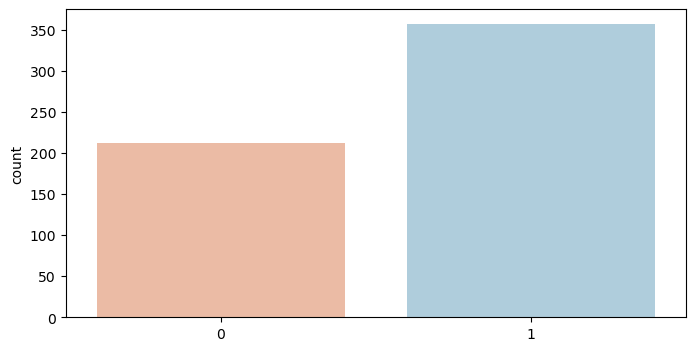

In [7]:
# Plotting number of targets based on prediction (benign or malignant)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



plt.figure(figsize=(8, 4))
sns.countplot(patients.target, palette='RdBu')

benign = np.count_nonzero(patients.target == 1)
malignant = np.count_nonzero(patients.target == 0)

print(f"Liczba komorek oznaczonych jako Benign: {benign}")
print(f"Liczba komorek oznaczonych jako Malignant: {malignant}\n")
print(f"% komorek oznaczonych jako Benign: {round(benign / len(patients.target) * 100, 2)}%")
print(f"% komorek oznaczonych jako Malignant: {round(malignant / len(patients.target) * 100, 2)}%")

In [8]:
# Plotting features relations (not working!)

#import seaborn as sb
#
#sb.set_theme(style="ticks")
#sb.pairplot(data_pd, hue="species")

Chociaż zbiór danych ma 30 kolumn, są one w rzeczywistości bardzo blisko powiązane, ponieważ wszystkie zawierają informacje na temat tych samych 10 kluczowych atrybutów.

/var/folders/br/g_qkzzcn0sg04fh1nzf_c1180000gn/T/ipykernel_19495/196885324.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


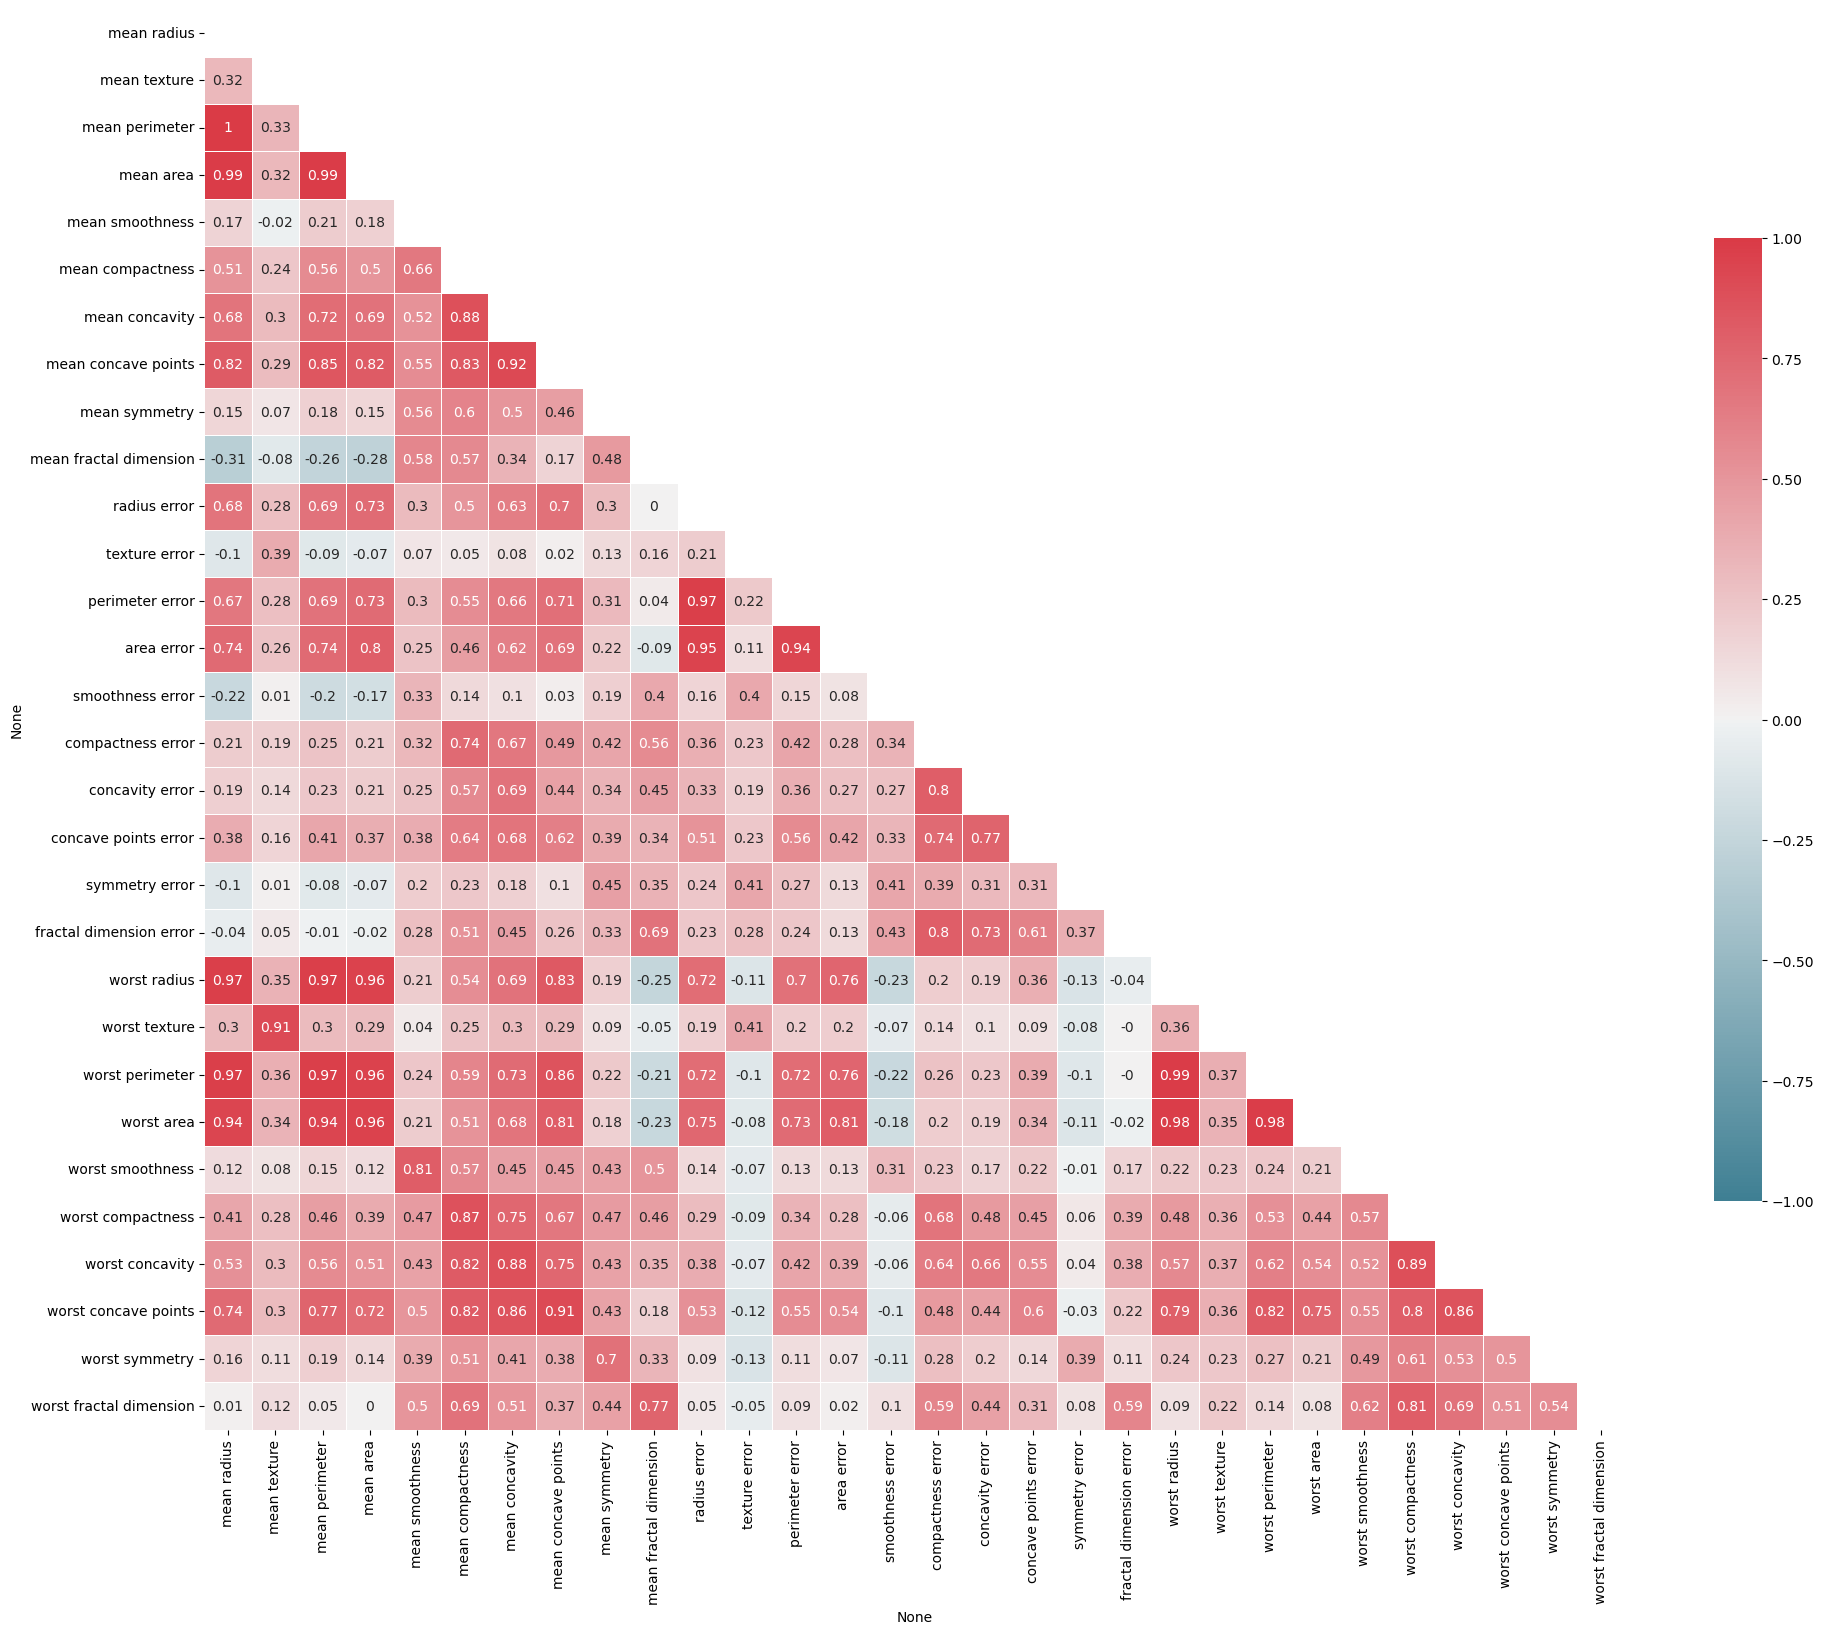

In [9]:
# Generate and visualize the correlation matrix
corr = data_pd.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

Patrząc na macierz możemy natychmiast stwierdzić korelację wielu danych. Przykładowo kolumna radius_mean ma wynik korelacji odpowiednio 1 i 0,99 z kolumnami perimeter_mean i area_mean. Dzieje się tak prawdopodobnie dlatego, że te trzy kolumny zasadniczo zawierają te same informacje, czyli fizyczny rozmiar obserwacji (komórki). Dlatego, przechodząc do dalszej analizy, powinniśmy wybrać tylko jedną z trzech kolumn.
5
  
Zależność, jest widoczna również między kolumnami „średnimi” a kolumnami „najgorszymi”. Na przykład kolumna radius_mean ma wynik korelacji 0,97 z kolumną radius_worst. W rzeczywistości każdy z 10 kluczowych atrybutów wykazuje bardzo wysokie (od 0,7 do 0,97) korelacje między kolumnami „średnimi” i „najgorszymi”. Jest to nieuniknione, ponieważ „najgorsze” kolumny są zasadniczo podzbiorem kolumn „średnich”. Z tego powodu powinniśmy odrzucić „najgorsze” kolumny i skupić się tylko na kolumnach „średnich”.
Niestety oba rodzaje korelacji w naszym wypadku były niemożliwe do wyeliminowania z powodu licznych błędów przy usuwaniu cech z analizy.

Wykorzystane narzędzia

Celem utworzenia możliwie najlepszego modelu wykorzystamy liczne narzędzia dostarczane przez bibliotekę Scikit-learn. Są to m.in:
1) Narzędzia służące do oceny jakości modelu takie jak:
○ prediction probability (prawdopodobieństwo przewidywania)
○ accuracy score (wynik dokładności)
○ confusion matrix (macierz pomyłek)
○ cross-validation (walidacja krzyżowa)
2) Polynomial features (cechy wielomianowe)

Wprowadzenie teoretyczne

1. Uczenie maszynowe

Uczenie maszynowe (ang. machine learning) - dział sztucznej inteligencji zajmujący się teorią i praktycznym zastosowaniem algorytmów analizujących dane. Algorytmy te poprawiają się automatycznie poprzez doświadczenie, czyli ekspozycje na dane. Budowane są modele, dzięki którym komputer nie potrzebuje więcej ingerencji człowieka w analizie danych - niepotrzebne są bezpośrednie instrukcje. Uczenie maszynowe posiada trzy swoje podstawowe odmiany: uczenie nadzorowane, uczenie nienadzorowane oraz uczenie przez wzmacnianie.
Uczenie nadzorowane (ang. supervised machine learning) analizuje dane i buduje modele za pomocą wejściowych danych uczących oznaczonych etykietami (and. labels). Model uczenia nadzorowanego można przedstawić na następującym grafie:

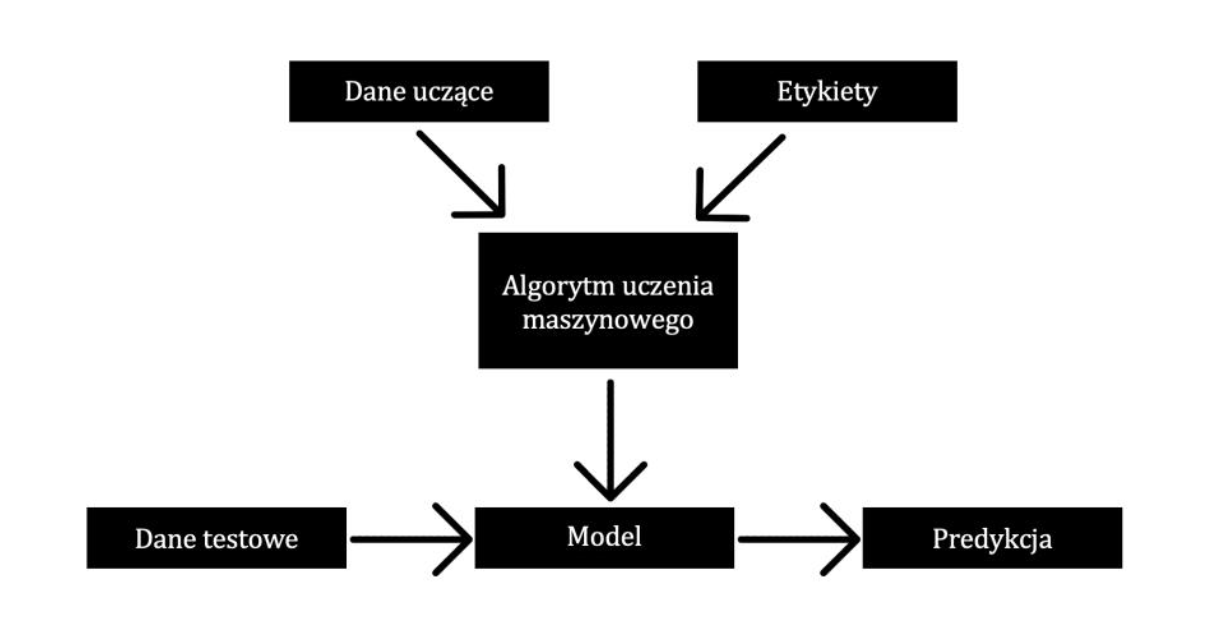

Uczenie nadzorowane dzieli się na klasyfikację oraz regresję. Algorytmami regresji są między innymi Regresja Liniowa, Maszyna Wektorów Nośnych oraz Regresja Poissona, a klasyfikacji: Sieci Neuronowe, Drzewa Decyzyjne, Naiwny Klasyfikator Bayesowski oraz Regresja Logistyczna, której będę używał


2. Regresjalogistyczna

Regresja logistyczna jest uogólnionym przypadkiem modelu liniowego - zmienna przewidywana jest zmienną dychotomiczną, a więc przyjmuje tylko dwie wartości (np. 0/1, choroba/zdrowie, sukces/porażka). Model jest opisywany przez funkcję sigmoidalną w postaci:

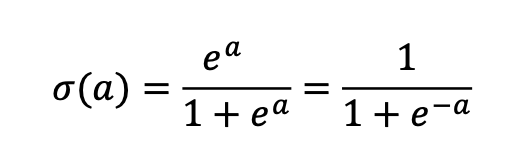

Wartość a stanowi tutaj całkowite pobudzenie, czyli liniową kombinację wag i cech funkcji, która można policzyć za pomocą wzoru

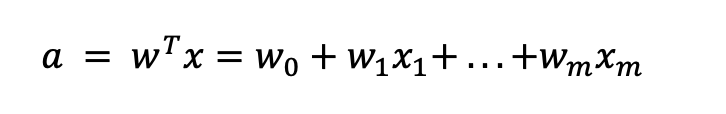

gdzie:
x - dane wejściowe,
w - wektor wag powiązany z danymi

Funkcja logistyczna przyjmuje wartości od 0 (gdy x dąży do -∞) do 1 (gdy x zmierza do ∞).

In [ ]:
# Plotting logistic function graph

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color="k")
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color="k")
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()


3. Macierz pomyłek

Macierz pomyłek (ang. Confusion Matrix) podzielona jest na cztery komórki: kolumny oznaczają wynik predyktowany jako pozytywny lub jako negatywny, a wiersze rzeczywisty wynik pozytywny bądź negatywny. Zostaje zwracana jako element analizy jakości klasyfikacji binarnej, gdzie możliwe są dwie opcje zaklasyfikowania. Przykładowo, jeśli wprowadzimy daną, która posiada etykietę pozytywną, a model zaklasyfikuje ją jako daną z etykietą negatywną, predykcja będzie w Macierzy Pomyłek w komórce z klasą predyktowaną fałszywie negatywną.


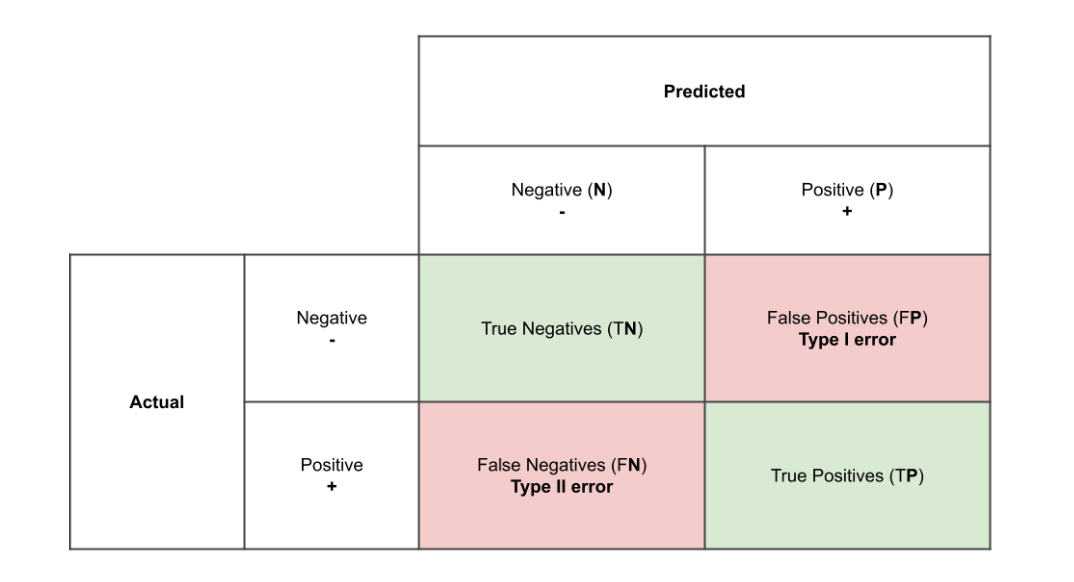

4. Walidacja krzyżowa

Walidacja krzyżowa (ang. Cross-validation) - technika podziału zbioru danych na zbiór trenujący i testujący. Służy do oceny jakości modelu. Najpopularniejszy sposób walidacji krzyżowej to schemat walidacji k-krotnej (ang. K-Fold Cross Validation). Dzieli ona zbiór danych na k części, z których jedna to zbiór testujący, a (k-1) to zbiór trenujący. Następnie algorytm przeprowadza k iteracji, podczas których zbiorem testującym zostaje kolejna, jedna z k części zbioru danych. Może to być przydatne do poprawy jakości modelu, kiedy dysponujemy niewielkim zestawem danych. Algorytm ten można przedstawić następującym schematem:

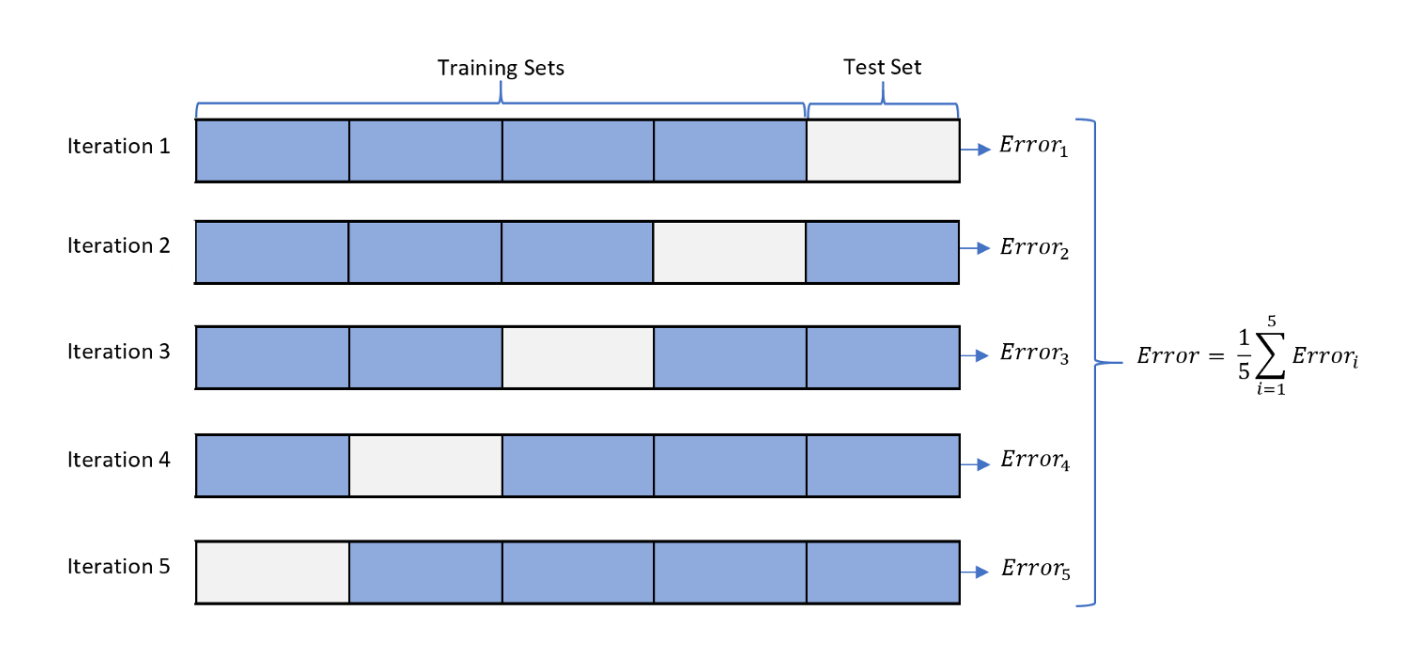

5. Cechy wielomianowe

Cechy wielomianowe (ang. Polynomial Features) - technika dodawania cech pochodzących z wielomianów o wyższym stopniu dla każdej z istniejących cech do zbioru danych. Jest to głównie wykorzystywane przy trenowaniu modeli regresji liniowej, ponieważ pozwala na modelowanie nieliniowych zależności prostymi algorytmami.
Przykładowo, jeżeli dane wejściowe są dwuwymiarowe i w postaci [𝑎, 𝑏], polynomial features 2-go stopnia wyglądają następująco: [1, 𝑎, 𝑏, 𝑎2, 𝑎𝑏, 𝑏2].


6. Rekurencyjna eliminacja cech

Rekurencyjna eliminacja cech (ang. Recursive Feature Elimination lub RFE) - iteracyjny algorytm selekcyjny, który w kolejnych krokach eliminuje poszczególne cechy, jeśli dokładność modelu na tym zyskuje. Służy to zachowaniu odpowiedniego stopnia korelacji między danymi treningowymi i modelem. Alternatywną metodą jest tak zwana metoda współczynnika regularyzacyjnego.

Badania symulacyjne

Pierwszym krokiem było ustalenie czy dane wymagają standaryzacji. W tym celu wyświetliliśmy dane opisujące pierwszego pacjenta oraz średnie wartości i błędy standardowe wszystkich atrybutów dla wszystkich instancji.

In [10]:
# 1-st patient features

print(patients['data'][1,:])

[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02]


In [11]:
# Mean and Standard Deviation of the dataset

print("---Mean---")
print(patients['data'].mean(axis=0))
print("---std---")
print(patients['data'].std(axis=0))

---Mean---
[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
---std---
[3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]


Dane wymagały standaryzacji. Do tego zadania posłużyłem się StandardScaler’em.

In [12]:
# Scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(patients.data)

In [13]:
# Mean and Standard Deviation of the dataset after scaling

print(scaled_data[1,:])
print('---Mean---')
print(scaled_data.mean(axis=0))
print('--std---')
print(scaled_data.std(axis=0))

[ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
 -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
  1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
  2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
 -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
  1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
 -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
 -2.43889668e-01  2.81189987e-01]
---Mean---
[-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]
--std---
[1

Budowa modelu

Budowę modelu rozpocz od podzielenia wczytanych danych na rozłączne zbiory: treningowy oraz testowy. Stosunek ich ilości wynosi 9:1.

In [14]:
# Splitting

from sklearn.model_selection import train_test_split

patients_train_data, patients_test_data, \
patients_train_target, patients_test_target = \
train_test_split(scaled_data, patients.target, test_size=0.1)

In [15]:
# Training and testing sets sizes

print("Training dataset:")
print(f"patients_train_data: {patients_train_data.shape}")
print(f"patients_train_target: {patients_train_target.shape}\n")

print("Testing dataset:")
print(f"patients_test_data: {patients_test_data.shape}")
print(f"patients_test_target: {patients_test_target.shape}")

Training dataset:
patients_train_data: (512, 30)
patients_train_target: (512,)

Testing dataset:
patients_test_data: (57, 30)
patients_test_target: (57,)


W kolejnym kroku skorzystaliśmy z regresji logistycznej. W bibliotece SciKit- Learn jest to trywialnie proste, ponieważ istnieje specjalna klasa implementująca to zadanie. Po utworzeniu instancji tej klasy korzystamy z metody fit() przekazując jej dane treningowe (dane oraz odpowiadające im etykiety). Wyznacza ona granicę decyzyjną dla przekazanych danych (funkcję h𝜃 (𝑥).

In [16]:
# Training the model with Logistic Regression

from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(patients_train_data, patients_train_target)

LogisticRegression()

Mamy zatem działający model, który możemy wykorzystać do predykcji danych. W kolejnym kroku przetestowałem jego działanie.

Testowanie modelu

Model przetestowałem wyświetlając wartości przewidywane dla trzech losowo wybranych instancji spośród danych testowych i zestawiając je z odpowiadającymi im etykietami. We wszystkich przypadkach model dokonał prawidłowej predykcji.

In [17]:
# Printing predicted and real value for 3 patients with a random id

import random


id = random.randint(0,56)

prediction = logistic_regression.predict(patients_test_data[id,:].reshape(1,-1))
print(f"Model predicted for patient {id} value {prediction}")
print(f"Real value for patient \"{id}\" is {patients_test_target[id]}\n")


id = random.randint(0,56)

prediction = logistic_regression.predict(patients_test_data[id,:].reshape(1,-1))
print(f"Model predicted for patient {id} value {prediction}")
print(f"Real value for patient \"{id}\" is {patients_test_target[id]}\n")


id = random.randint(0,56)

prediction = logistic_regression.predict(patients_test_data[id,:].reshape(1,-1))
print(f"Model predicted for patient {id} value {prediction}")
print(f"Real value for patient \"{id}\" is {patients_test_target[id]}")

Model predicted for patient 38 value [1]
Real value for patient "38" is 1

Model predicted for patient 4 value [0]
Real value for patient "4" is 0

Model predicted for patient 44 value [1]
Real value for patient "44" is 1


Dla ostatniej sprawdzanej instancji wyświetlam dodatkowo prawdopodobieństwo przewidywania (prediction probability), aby sprawdzić jak bardzo model był pewny przypisanej etykiety. Model przypisał jej prawdopodobieństwo wynoszące około 0,95.

In [18]:
# Printing the probability of the prediction for the testing set

prediction_probability = logistic_regression.predict_proba(patients_test_data[id,:].reshape(1,-1))
print(f"Prediction probability: {prediction_probability}")

Prediction probability: [[1.65715380e-04 9.99834285e-01]]


Ocena modelu

Przechodzę teraz do oceny modelu. Służy do tego wynik dokładności (accuracy score) oraz macierz pomyłek (confusion matrix). Celem wykonania oceny dokładności korzystam z funkcji accuracy_score(), która sprawdza poprawność predykcji dla wszystkich danych testowych. Model okazał się być zgodny w niemal 95%.

In [19]:
# Printing the accuracy score of testing set

from sklearn.metrics import accuracy_score

acc = accuracy_score(patients_test_target, logistic_regression.predict(patients_test_data))
print(f"Model accuracy is {acc}")

Model accuracy is 0.9298245614035088


Macierz pomyłek dla 57 instancji testowych wskazała 3 błędne przewidywania modelu. Wszystkie błędy polegały na niewłaściwym przypisaniu etykiety “1”. Wynik ten zgadza się z oceną dokładności (54/57 ≈ 0.94 ).

In [20]:
# Printing confusion matrix of the testing set

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(patients_test_target, logistic_regression.predict(patients_test_data))


true_negative = conf_matrix[0][0]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]
true_positive = conf_matrix[1][1]

print('Confusion Matrix: \n', conf_matrix, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / (true_negative + true_positive + false_negative + false_positive)
            * 100, 1), '%')

Confusion Matrix: 
 [[16  4]
 [ 0 37]] 

True Negative: 16
False Positive: 4
False Negative: 0
True Positive: 37
Correct Predictions 93.0 %


Sprawdziliśmy także model przy pomocy walidacji krzyżowej dla różnych ilości podziałów danych.

In [21]:
# Printing Mean Value Score of the testing set

from sklearn.model_selection import cross_val_score

for i in range(2,7):
    scores = cross_val_score(LogisticRegression(), patients_test_data, patients_test_target, cv=i)
    print(f"Mean value score for i = {i} is {scores.mean():.2f}")

Mean value score for i = 2 is 0.95
Mean value score for i = 3 is 0.93
Mean value score for i = 4 is 0.96
Mean value score for i = 5 is 0.93
Mean value score for i = 6 is 0.93


Wyniki analizy poprzez różne parametry algorytmu są bardzo zbliżone do siebie, prawdopodobnie przez wielkość zbioru. Najlepszy wynik osiągnął podział na 2 zbiory. Przy powtarzaniu algorytmu w zdecydowanej większości przypadków najlepszym wynikiem był właśnie ten podział.

Model przetestowaliśmy również pod kątem przeuczenia. W tym celu wykorzystaliśmy cechy wielomianowe (polynomial features) zmieniając dane z liniowych na wielomianowe i sprawdzając błąd średniokwadratowy oraz wynik wariancji dla różnych stopni wielomianu

In [41]:
# Printing Squared Error and Variance Score for 6 different values of Polyomial Features

%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6]
y_mean = []
y_score = []

for i in range (1, 7):
    pt = PolynomialFeatures(i, )
    patients_train_poly = pt.fit_transform(patients_train_data)
    patients_test_poly = pt.fit_transform(patients_test_data)
    
    lr_poly = LogisticRegression()
    lr_poly.fit(patients_train_poly, patients_train_target)
    
    print(f"-=={i} degree==-") 
    print(f"squared error: %.2f" % mean_squared_error(patients_test_target, lr_poly.predict(patients_test_poly)))
    print("variance score: %.2f" % lr_poly.score(patients_test_poly, patients_test_target))
    y_mean.append(mean_squared_error(patients_test_target, lr_poly.predict(patients_test_poly)))
    y_score.append(lr_poly.score(patients_test_poly, patients_test_target))

-==1 degree==-
squared error: 0.07
variance score: 0.93
-==2 degree==-
squared error: 0.04
variance score: 0.96
-==3 degree==-
squared error: 0.09
variance score: 0.91


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-==4 degree==-
squared error: 0.05
variance score: 0.95


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-==5 degree==-
squared error: 0.09
variance score: 0.91


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-==6 degree==-
squared error: 0.07
variance score: 0.93


Zmiana rzędu wielomianu w zakresie od 1 do 6 wpływa na model nieznacznie. Może to być spowodowane widocznym na wykresie danych obszarem o dużym zagęszczeniu obiektów obu klas. Przeprowadzenie wyraźnej linii decyzyjnej zwiększającej dokładność modelu wymagałoby użycia wielomianu wyższego rzędu. Nie zdecydowaliśmy się na to jednak z powodu relatywnie wysokiego kosztu takiego rozwiązania względem niewielkiej poprawy modelu oraz zagrożenia przeuczenia modelu.

Wnioski

Model został wykonany prawidłowo, co potwierdzają narzędzia służące do oceny modelu. Przyporządkowuje on właściwe etykiety dla ponad 90% danych testowych.

Najbardziej obiecującą metodą na poprawę jakości modelu było usunięcie zbędnych cech, które przez silną korelację między sobą jedynie utrudniały odnalezienie właściwej granicy decyzyjnej. Posłużyć do tego mogło wyeliminowanie niektórych danych już na etapie analizy lub zastosowanie rekursywnej eliminacji cech. Niestety obie metody powodowały liczne błędy i z tej przyczyny nie zostały wykorzystane.

W trakcie naszej pracy wyraźnie widoczna była pewna komplikacja w tworzeniu modelu w oparciu o wykorzystany zestaw danych - niewielka liczba instancji. Skutkowało to niejednokrotnie różnymi wynikami tych samych operacji w kolejnych próbach stworzenia modelu. Różnice te jednak nie były znaczne i skuteczność modelu zawsze oscylowała wokół 95%.

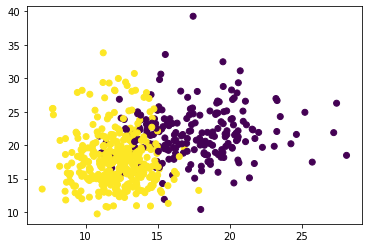

In [42]:
# Plotting targets

plt.scatter(patients.data[:,0],patients.data[:,1], c=patients.target)

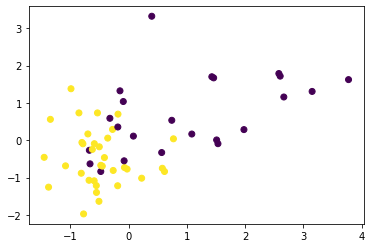

In [43]:
# Plotting targets of the testing set

plt.scatter(patients_test_data[:,0],patients_test_data[:,1], c=patients_test_target)

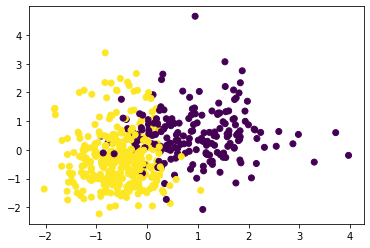

In [44]:
# Plotting targets of the training set

plt.scatter(patients_train_data[:,0],patients_train_data[:,1], c=patients_train_target)

In [ ]:
#Recursive feature elimination (not working!)

# from sklearn.feature_selection import RFE

# pt = PolynomialFeatures(3, )#interaction_only=True)
# patients_train_poly = pt.fit_transform(patients_train_data)
# patients_train_poly.shape
# patients_test_poly = pt.fit_transform(patients_test_data)



# sel_ = RFE(estimator=LogisticRegression(), n_features_to_select=45)
# sel_.fit(patients_train_poly, patients_train_target)

# print(sel_.support_)
# print(sel_.ranking_)

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# from sklearn.feature_selection import RFE
# from sklearn.preprocessing import PolynomialFeatures

# x_mean=[]
# y_mean=[]
# x_score=[]
# y_score=[]

# pt = PolynomialFeatures(3, )#interaction_only=True)
# patients_train_poly = pt.fit_transform(patients_train_data)
# patients_train_poly.shape
# patients_test_poly = pt.fit_transform(patients_test_data)

# for i in range (5,65,5):
#     x_mean.append(i)
#     x_score.append(i)
#     sel_ = RFE(estimator=LogisticRegression(), n_features_to_select=45)
#     sel_.fit(patients_train_poly, patients_train_target)
    
#     print(f"-=={i} features==-") 
#     print("squared erro: %.2f" % 
#         mean_squared_error(patients_test_target, sel_.predict(patients_test_poly)))
#     score = sel_.score(patients_test_poly, patients_test_target)
#     print("variance score: %.2f" % score)
    
#     y_mean.append(mean_squared_error(patients_test_target, sel_.predict(patients_test_poly)))
#     y_score.append(score)
    
# plt.figure(figsize=(10, 5))
# plt.yscale('symlog')
# plt.plot(x_mean, y_mean)
# plt.show()

# plt.figure(figsize=(10, 5))
# plt.yscale('symlog')
# plt.plot(x_score, y_score)
# plt.show()